In [3]:
from pandas_datareader import data,wb
import pandas as pd
import seaborn as sns
import datetime
%matplotlib inline

In [4]:
start = datetime.datetime(2006,1,1)
end=datetime.datetime(2021,1,1)

In [13]:
TSLA=data.DataReader('TSLA','yahoo',start,end)
BAC=data.DataReader('BAC','yahoo',start,end)
MSFT=data.DataReader('MSFT','yahoo',start,end)
APLE=data.DataReader('AAPL','yahoo',start,end)
MS=data.DataReader('MS','yahoo',start,end)

In [14]:
tickers=['APLE','BAC','MSFT','MS','TSLA']

In [16]:
stock_data=pd.concat([APLE,BAC,MSFT,MS,TSLA],axis=1,keys=tickers)

In [18]:
stock_data.tail(5)

AAPL                          ...        TSLA                        
                  High         Low        Open  ...       Close      Volume   Adj Close
Date                                            ...                                    
2020-12-24  133.460007  131.100006  131.320007  ...  661.770020  22865600.0  661.770020
2020-12-28  137.339996  133.509995  133.990005  ...  663.690002  32278600.0  663.690002
2020-12-29  138.789993  134.339996  138.050003  ...  665.989990  22910800.0  665.989990
2020-12-30  135.990005  133.399994  135.580002  ...  694.780029  42846000.0  694.780029
2020-12-31  134.740005  131.720001  134.080002  ...  705.669983  49649900.0  705.669983

[5 rows x 30 columns]

In [20]:
stock_data.columns.names=['Stock Ticker','Stock info']

In [21]:
stock_data

Stock Ticker        AAPL                          ...        TSLA                        
Stock info          High         Low        Open  ...       Close      Volume   Adj Close
Date                                              ...                                    
2006-01-03      2.669643    2.580357    2.585000  ...         NaN         NaN         NaN
2006-01-04      2.713571    2.660714    2.683214  ...         NaN         NaN         NaN
2006-01-05      2.675000    2.633929    2.672500  ...         NaN         NaN         NaN
2006-01-06      2.739286    2.662500    2.687500  ...         NaN         NaN         NaN
2006-01-09      2.757143    2.705000    2.740357  ...         NaN         NaN         NaN
...                  ...         ...         ...  ...         ...         ...         ...
2020-12-24    133.460007  131.100006  131.320007  ...  661.770020  22865600.0  661.770020
2020-12-28    137.339996  133.509995  133.990005  ...  663.690002  32278600.0  663.690002
2020-12-29    138.789993  134.339996  138.050003  ...  665.989990  22910800.0  665.989990
2020-12-30    135.990005  133.399994  135.580002  ...  694.780029  42846000.0  694.780029
2020-12-31    134.740005  131.720001  134.080002  ...  705.669983  49649900.0  705.669983

[3776 rows x 30 columns]

In [23]:
stock_data.xs(key='Close',axis=1,level='Stock info').max()

Stock Ticker
AAPL    136.690002
BAC      54.900002
MSFT    231.649994
MS       89.300003
TSLA    705.669983
dtype: float64

In [25]:
returns = pd.DataFrame()

In [26]:
for tick in tickers:
    returns[tick+'Return']=stock_data[tick]['Close'].pct_change()

In [27]:
returns

,AAPLReturn,BACReturn,MSFTReturn,MSReturn,TSLAReturn
Date,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN
2006-01-04,0.002943,-0.010620,0.004843,0.000686,NaN
2006-01-05,-0.007870,0.001288,0.000742,0.002742,NaN
2006-01-06,0.025813,-0.001501,-0.002964,0.001025,NaN
2006-01-09,-0.003277,0.000644,-0.001858,0.010586,NaN
...,...,...,...,...,...
2020-12-24,0.007712,-0.002995,0.007827,-0.001759,0.024444
2020-12-28,0.035766,0.005674,0.009921,-0.000587,0.002901
2020-12-29,-0.013315,-0.003983,-0.003601,-0.004996,0.003465


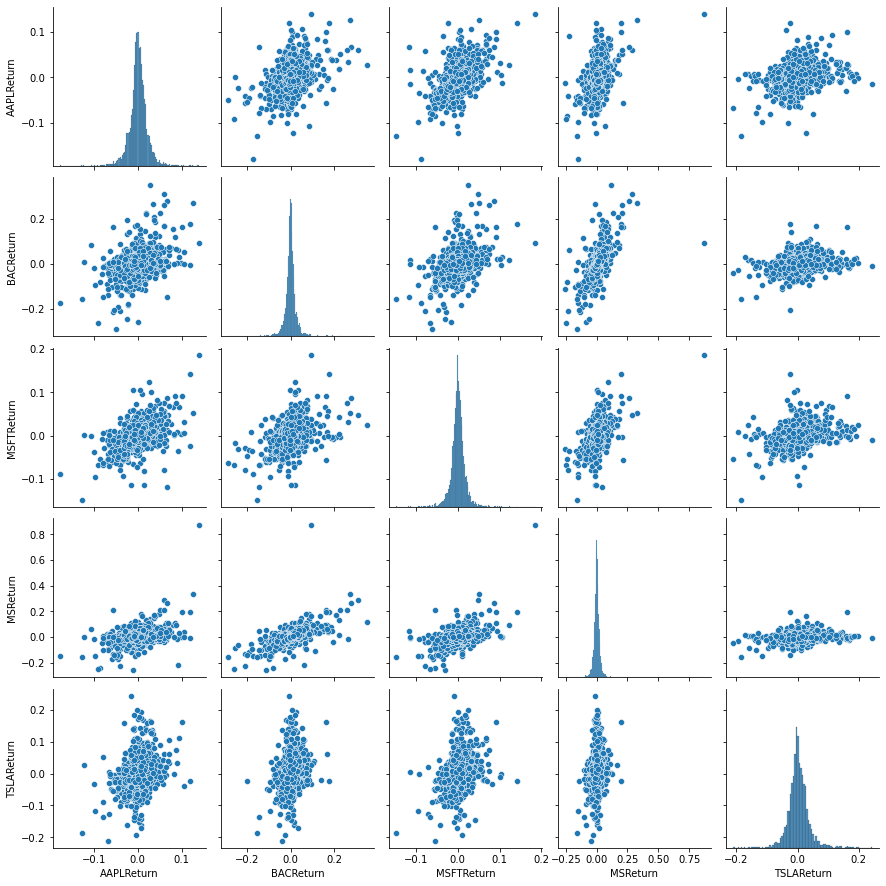

In [28]:
sns.pairplot(returns)

In [29]:
returns.idxmax()

AAPLReturn   2008-10-13
BACReturn    2009-04-09
MSFTReturn   2008-10-13
MSReturn     2008-10-13
TSLAReturn   2013-05-09
dtype: datetime64[ns]

In [30]:
returns.idxmin()

AAPLReturn   2008-09-29
BACReturn    2009-01-20
MSFTReturn   2020-03-16
MSReturn     2008-10-09
TSLAReturn   2020-09-08
dtype: datetime64[ns]

In [31]:
returns.std()

AAPLReturn    0.020771
BACReturn     0.032495
MSFTReturn    0.017674
MSReturn      0.033381
TSLAReturn    0.035483
dtype: float64

In [35]:
returns.loc['2016-01-01':'2020-01-01'].std()

AAPLReturn    0.015348
BACReturn     0.016186
MSFTReturn    0.013824
MSReturn      0.016637
TSLAReturn    0.029196
dtype: float64

C:\Users\FOUZAN-PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TSLAReturn', ylabel='Density'>

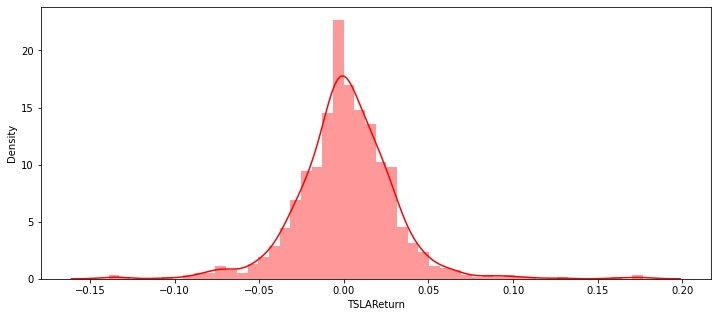

In [43]:
plt.figure(figsize=(12,5))
sns.distplot(returns.loc['2016-01-01':'2020-01-01']['TSLAReturn'],color='red',bins=50)

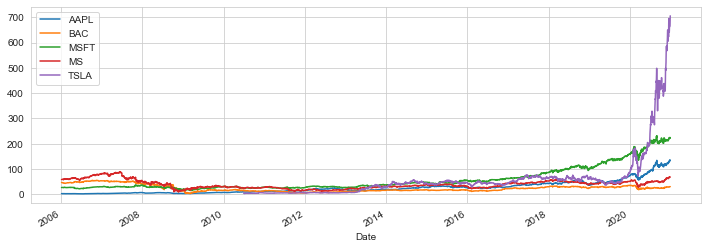

In [48]:
sns.set_style('whitegrid')
for tick in tickers:
    stock_data[tick]['Close'].plot(label=tick,figsize=(12,4))
plt.legend()

<AxesSubplot:xlabel='Date'>

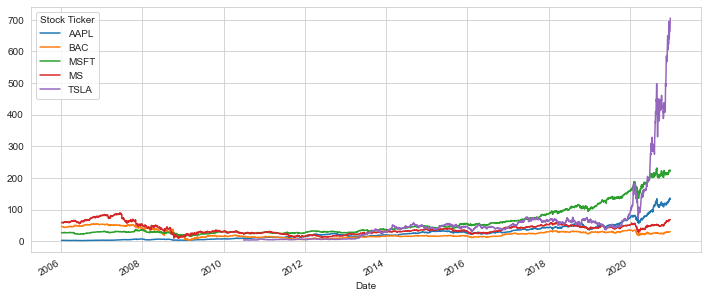

In [55]:
stock_data.xs(key='Close',level='Stock info',axis=1).plot(figsize=(12,5))

In [61]:
import cufflinks as cf
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()
stock_data.xs(key='Close',level='Stock info',axis=1).iplot()